***Importing the necessary libraries***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Reading the dataset***

In [3]:
dataset = pd.read_excel(r"/content/drive/MyDrive/Projects/Flight Price Prediction/Data_Train.xlsx")

In [4]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


***Performing EDA and Feature Engineering***

In [5]:
dataset.shape

(10683, 11)

In [6]:
dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
dataset.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
dataset.dropna(inplace = True)

In [10]:
dataset.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


Extracting day, month and year

In [11]:
dataset['Journey_day'] = pd.to_datetime(dataset.Date_of_Journey, format = '%d/%m/%Y').dt.day

In [12]:
dataset['Journey_month'] = pd.to_datetime(dataset.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [13]:
dataset['Journey_year'] = pd.to_datetime(dataset.Date_of_Journey, format = '%d/%m/%Y').dt.year

In [14]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [15]:
dataset.Journey_year.unique()

array([2019], dtype=int32)

In [16]:
# since we have only one year in journey_year column, so we are dropping it.
dataset.drop(['Journey_year'], axis = 1, inplace = True)

In [17]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
# since we have explored date_of_journey, we will drop it
dataset.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [19]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [20]:
# Departure time is when a plane leaves the gate.
# Similar to Date_of_Journey we can extract values from Dep_Time

dataset['Dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
dataset['Dep_min'] = pd.to_datetime(dataset['Dep_Time']).dt.minute
dataset.head()

<ipython-input-20-83c65ad3883a>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
<ipython-input-20-83c65ad3883a>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Dep_min'] = pd.to_datetime(dataset['Dep_Time']).dt.minute


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [21]:
# dropping the 'Dep_Time' column
dataset.drop(['Dep_Time'], axis = 1, inplace = True)

In [22]:
# similarly extracting hour and minute from 'Arrival_Time'
dataset['Arrival_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
dataset['Arrival_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute

# dropping the 'Arrrival_hour'
dataset.drop(['Arrival_Time'], axis = 1, inplace = True)
dataset.head()

<ipython-input-22-bbd44f1e9214>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Arrival_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
<ipython-input-22-bbd44f1e9214>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['Arrival_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# converting 'Duration' into list
duration = list(dataset['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' # addding 0m
        else:
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) # extracting hours
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # extracting mins

In [24]:
dataset['Duration_hours'] = duration_hours
dataset['Duration_mins'] = duration_mins

# dropping the 'Duration' column
dataset.drop(['Duration'], axis = 1, inplace = True)
dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case
Ordinal data --> data are in order --> LabelEncoder is used in this case

In [25]:
dataset['Airline'].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


**Visualising the data**

Relationship between 'Price' and 'Airline'

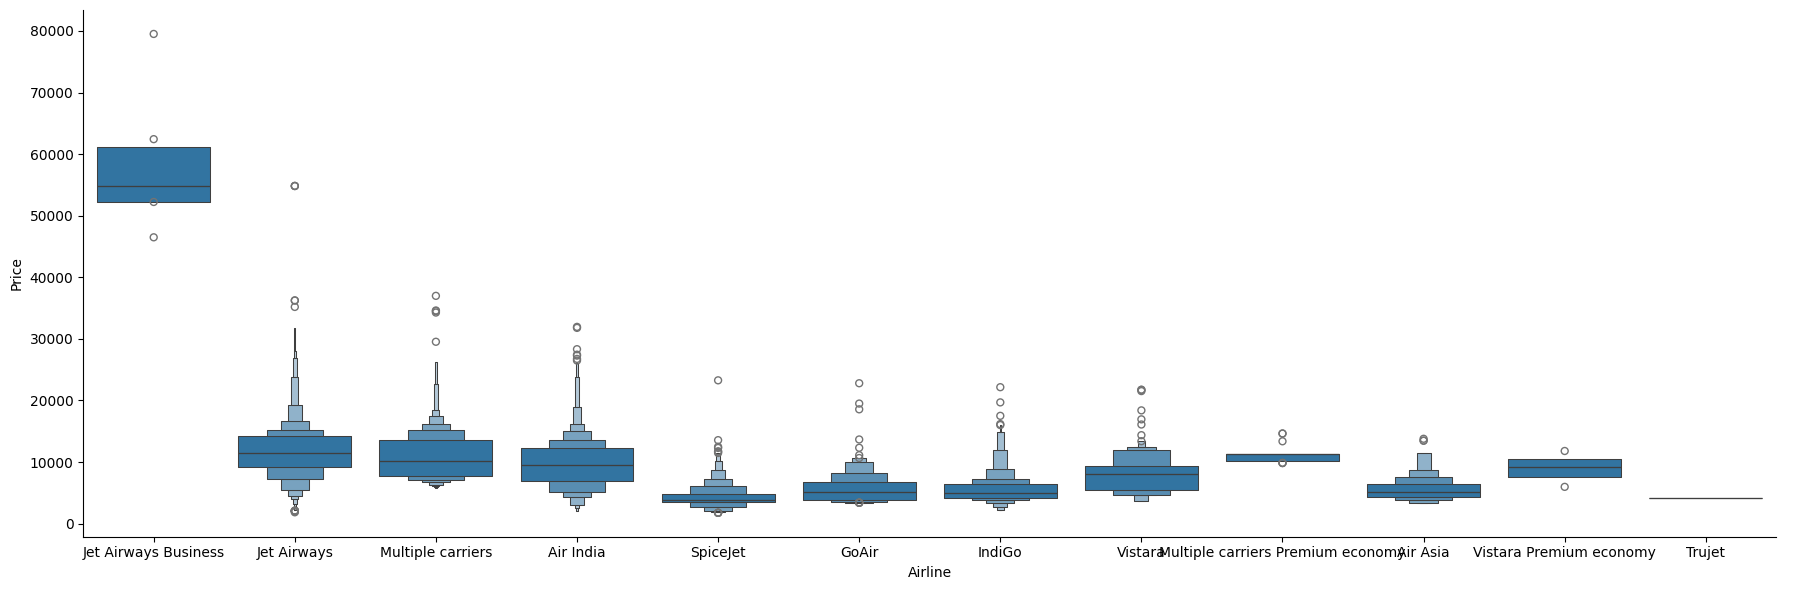

In [26]:
# Airline vs Price
sns.catplot(y = 'Price', x = 'Airline', data = dataset.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

From graph we can see that Jet Airways Business have the highest Price.
Apart from the first Airline almost all are having similar media

In [27]:
airline = dataset[['Airline']]
airline = pd.get_dummies(airline, drop_first = True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [28]:
dataset['Source'].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


Relationship between 'Price' and 'Source'

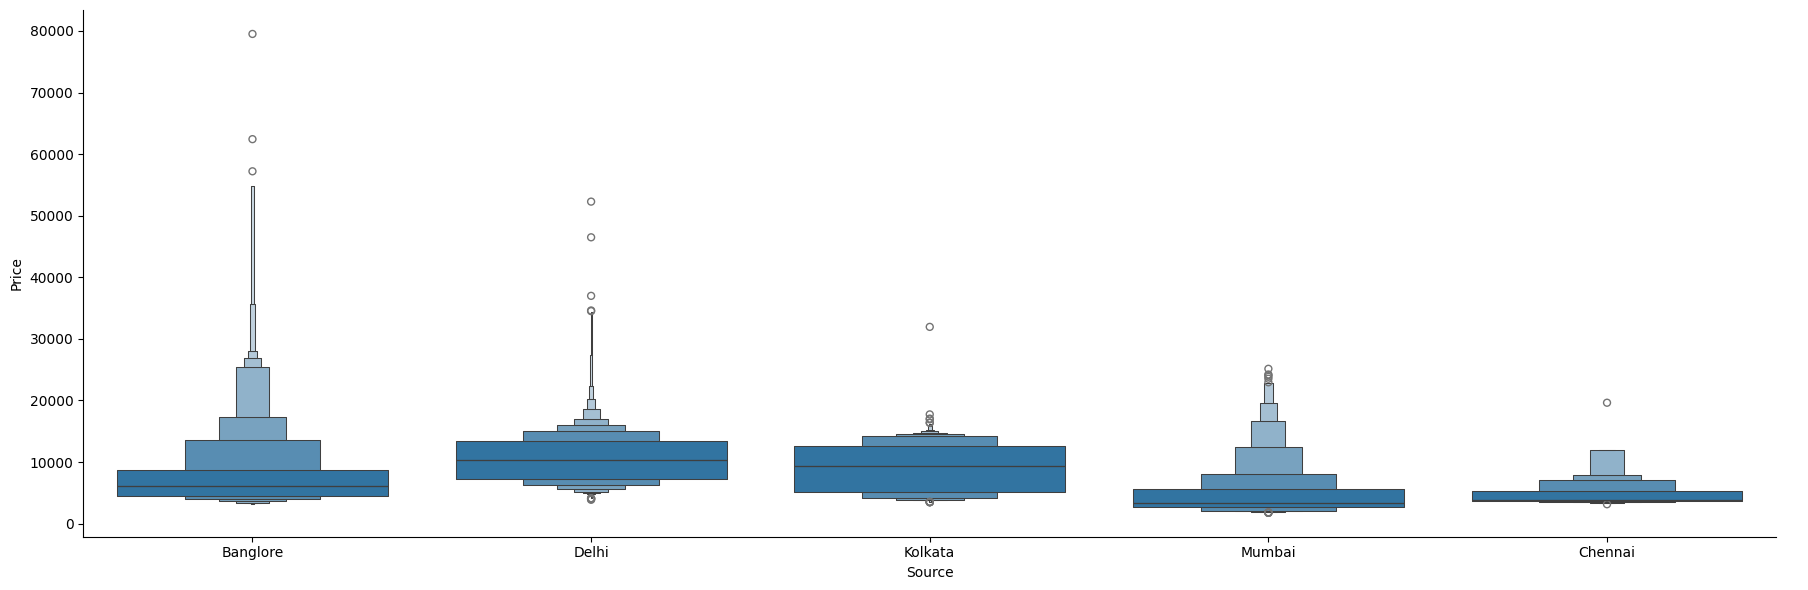

In [29]:
# Source vs Price
sns.catplot(y = 'Price', x = 'Source', data = dataset.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [30]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
source = dataset[['Source']]
source = pd.get_dummies(source, drop_first = True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [31]:
dataset['Destination'].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


Relationship between 'Price' and 'Destination'

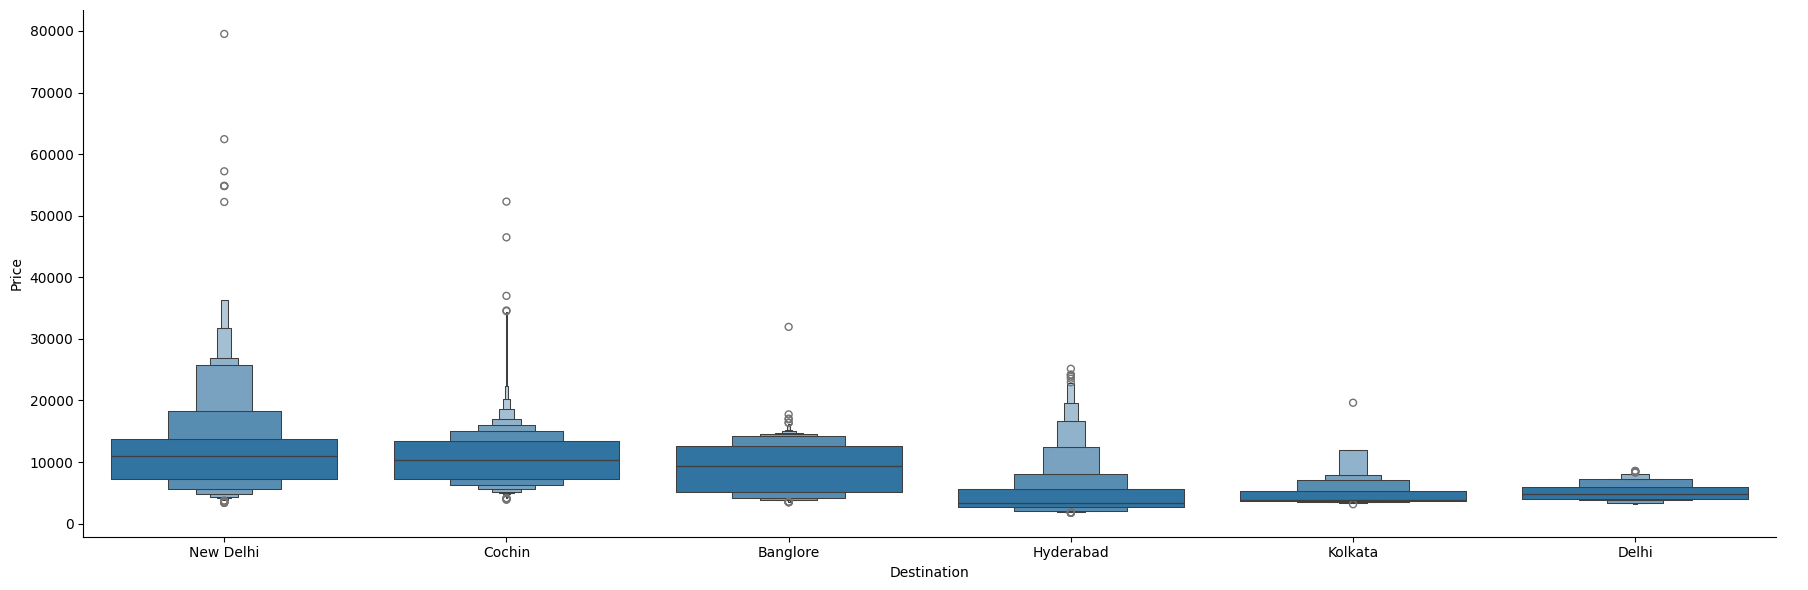

In [32]:
# Destination vs Price
sns.catplot(y = 'Price', x = 'Destination', data = dataset.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [33]:
# As Destination is categorical data, we will perform OneHotEncoding
destination = dataset[['Destination']]
destination = pd.get_dummies(destination, drop_first = True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [34]:
dataset['Route']

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL
5,CCU → BLR
6,BLR → BOM → DEL
7,BLR → BOM → DEL
8,BLR → BOM → DEL
9,DEL → BOM → COK


In [35]:
dataset['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


In [36]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [37]:
dataset["Total_Stops"].value_counts()


,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [38]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [39]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [40]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

dataset = pd.concat([dataset, airline, source, destination], axis = 1)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,False,False,False,False,False,False,False,False,False,True


In [41]:
dataset.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)
dataset.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [42]:
dataset.isnull().sum()

,0
Total_Stops,0
Price,0
Journey_day,0
Journey_month,0
Dep_hour,0
Dep_min,0
Arrival_hour,0
Arrival_min,0
Duration_hours,0
Duration_mins,0


In [43]:
dataset.shape

(10682, 30)

***Working on the Test Set***

In [46]:
# importing the train set
testset = pd.read_excel(r"/content/drive/MyDrive/Projects/Flight Price Prediction/Test_set.xlsx")

In [47]:
testset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:
# cleaning it like train set
testset.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [49]:
# extracting day, month, year from 'Date_of_Journey' and dropping the same column at last
testset['Journey_day'] = pd.to_datetime(testset.Date_of_Journey, format = '%d/%m/%Y').dt.day
testset['Journey_month'] = pd.to_datetime(testset.Date_of_Journey, format = '%d/%m/%Y').dt.month
testset['Journey_year'] = pd.to_datetime(testset.Date_of_Journey, format = '%d/%m/%Y').dt.year
testset.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [50]:
testset['Dep_hour'] = pd.to_datetime(testset['Dep_Time']).dt.hour
testset['Dep_min'] = pd.to_datetime(testset['Dep_Time']).dt.minute
testset.drop(['Dep_Time'], axis = 1, inplace = True)

testset['Arrival_hour'] = pd.to_datetime(testset['Arrival_Time']).dt.hour
testset['Arrival_min'] = pd.to_datetime(testset['Arrival_Time']).dt.minute
testset.drop(['Arrival_Time'], axis = 1, inplace = True)

duration = list(testset['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' # addding 0m
        else:
            duration[i] = '0h ' + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) # extracting hours
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # extracting mins

testset['Duration_hours'] = duration_hours
testset['Duration_mins'] = duration_mins
testset.drop(['Duration'], axis = 1, inplace = True)


airline = testset[['Airline']]
airline = pd.get_dummies(airline, drop_first = True)

destination = testset[['Destination']]
destination = pd.get_dummies(destination, drop_first = True)

testset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

testset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

testset = pd.concat([testset, airline, source, destination], axis = 1)
testset.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

<ipython-input-50-8b187722adfb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testset['Dep_hour'] = pd.to_datetime(testset['Dep_Time']).dt.hour
<ipython-input-50-8b187722adfb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testset['Dep_min'] = pd.to_datetime(testset['Dep_Time']).dt.minute
<ipython-input-50-8b187722adfb>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  testset['Arrival_hour'] = pd.to_datetime(testset['Arrival_Time']).dt.hour
<ipython-input-50-8b187722adfb>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back 

In [51]:
testset.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,2019.0,17.0,30.0,4.0,25.0,10.0,55.0,...,False,False,False,False,False,True,False,False,False,False
1,1.0,12.0,5.0,2019.0,6.0,20.0,10.0,20.0,4.0,0.0,...,False,False,False,True,False,False,False,False,False,False
2,1.0,21.0,5.0,2019.0,19.0,15.0,19.0,0.0,23.0,45.0,...,False,False,True,False,False,True,False,False,False,False
3,1.0,21.0,5.0,2019.0,8.0,0.0,21.0,0.0,13.0,0.0,...,False,False,False,True,False,True,False,False,False,False
4,0.0,24.0,6.0,2019.0,23.0,55.0,2.0,45.0,2.0,50.0,...,False,False,False,False,False,False,True,False,False,False


In [52]:
dataset.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [53]:
X = dataset.drop(['Price'], axis = 1)
y = dataset.iloc[:, 1]

In [54]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,True,...,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,...,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,...,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,...,False,False,False,False,False,False,False,False,False,True


In [55]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


Plotting heatmap of our dataset, to know the correlation between the columns

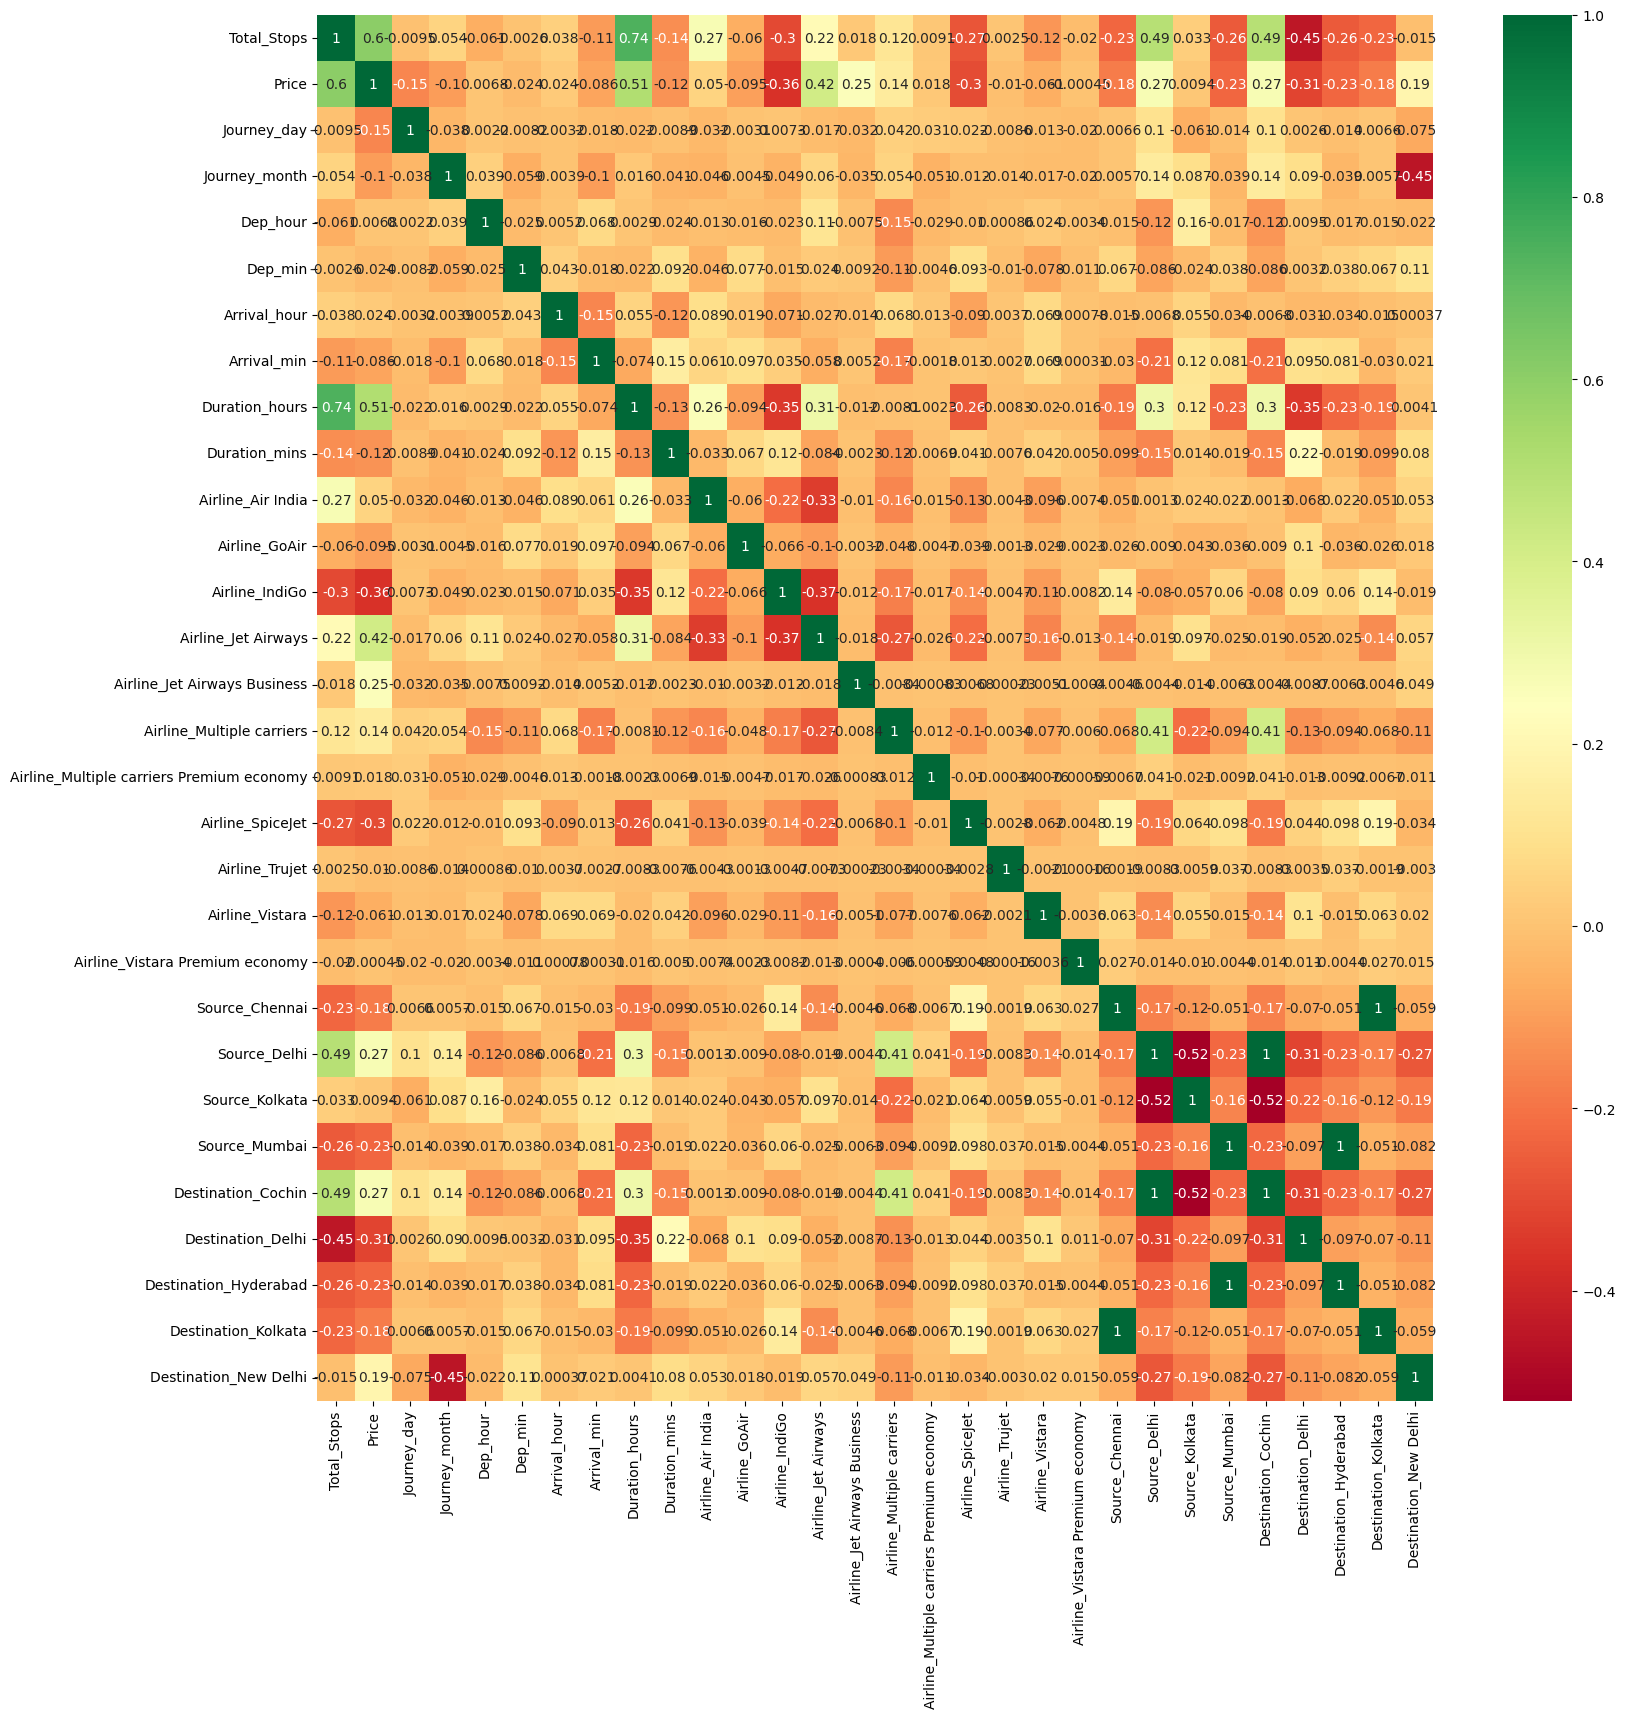

In [56]:
plt.figure(figsize = (18,18))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [57]:
# Using ExtraTreesRegressor to get the Important features

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[2.36233185e-01 1.43222570e-01 5.33462940e-02 2.42739636e-02
 2.13091968e-02 2.79738944e-02 1.92992570e-02 1.06137242e-01
 1.75213050e-02 9.94483130e-03 1.96635365e-03 1.67800229e-02
 1.43417433e-01 6.78821453e-02 1.82963143e-02 8.47944430e-04
 3.09422198e-03 1.14529434e-04 4.92739909e-03 7.06021868e-05
 5.21095195e-04 8.24610700e-03 3.15791423e-03 7.62815062e-03
 1.50130124e-02 1.53752920e-02 7.89346263e-03 5.41754230e-04
 2.49645066e-02]


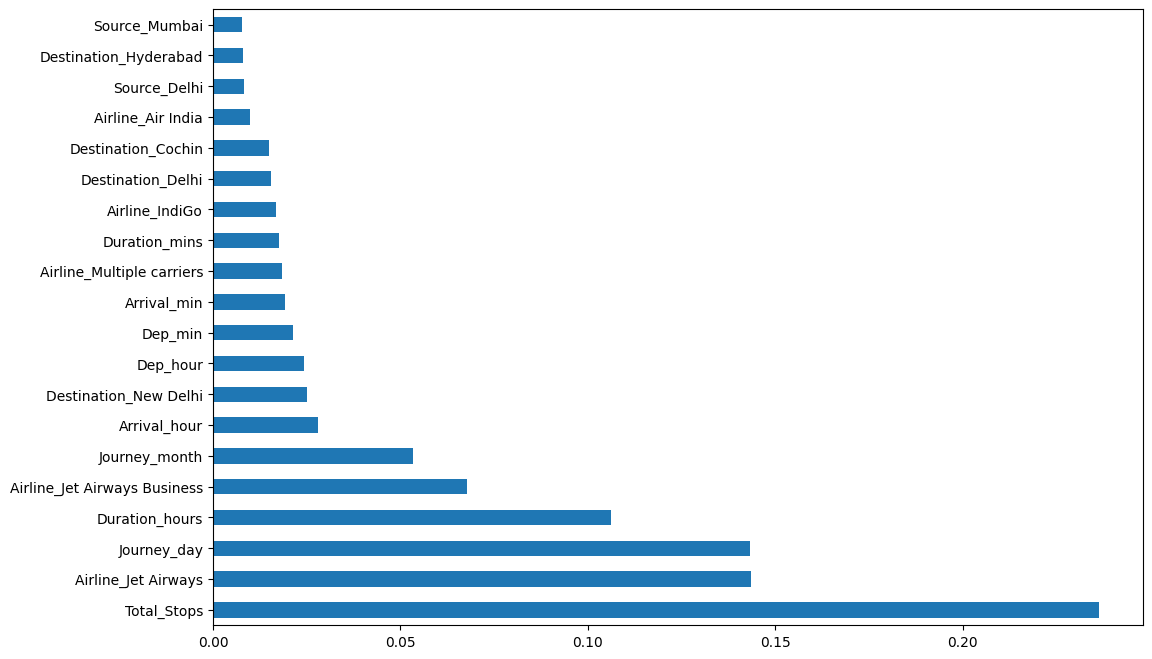

In [59]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using Random Forest

Split dataset into train and test set in order to prediction w.r.t X_test

Scaling is not needed in Random forest

1. Import model
2. Fit the data
3. Predict w.r.t X_test
4. Get the RSME Score
5. Plot graph

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [61]:
# using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = reg_rf.predict(X_test)

In [63]:
reg_rf.score(X_train, y_train)

0.9564753938670026

In [64]:
reg_rf.score(X_test, y_test)

0.8005798921540683

Plotting the distribution plot to get the idea of variation!

<ipython-input-65-3127f0defc67>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


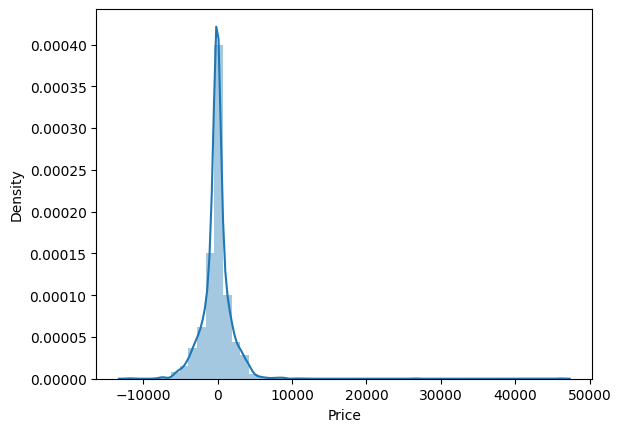

In [65]:
sns.distplot(y_test - y_pred)
plt.show()

Plotting the scatter plot

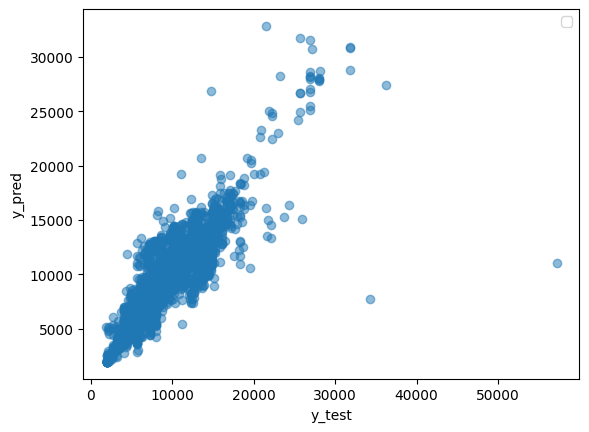

In [66]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show();

In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1170.1055913505718
MSE: 4068354.9786054436
RMSE: 2017.016355562206


In [68]:
metrics.r2_score(y_test, y_pred)

0.8005798921540683

Hyperparameter Tuning

Following method for hyperparameter tuning
    RandomizedSearchCV --> Fast
    GridSearchCV
1. Assign hyperparameters in form of dictionary
2. Fit the model
3. Check best paramters and best score

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# Randomized Search CV
# number of estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# minumun number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [71]:
# create the randomized search CV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [72]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [73]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [75]:
prediction = rf_random.predict(X_test)

Plotting the distribution plot again!

<ipython-input-76-b322b1d393bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


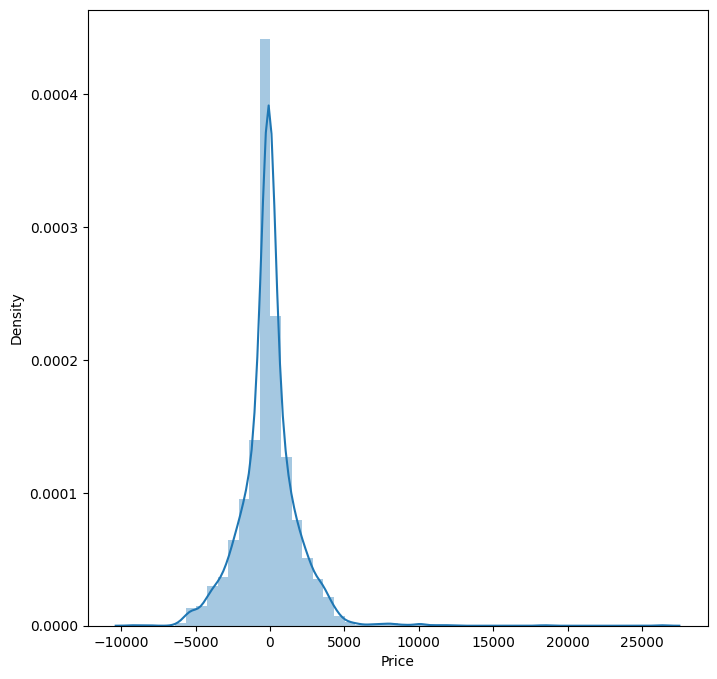

In [76]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

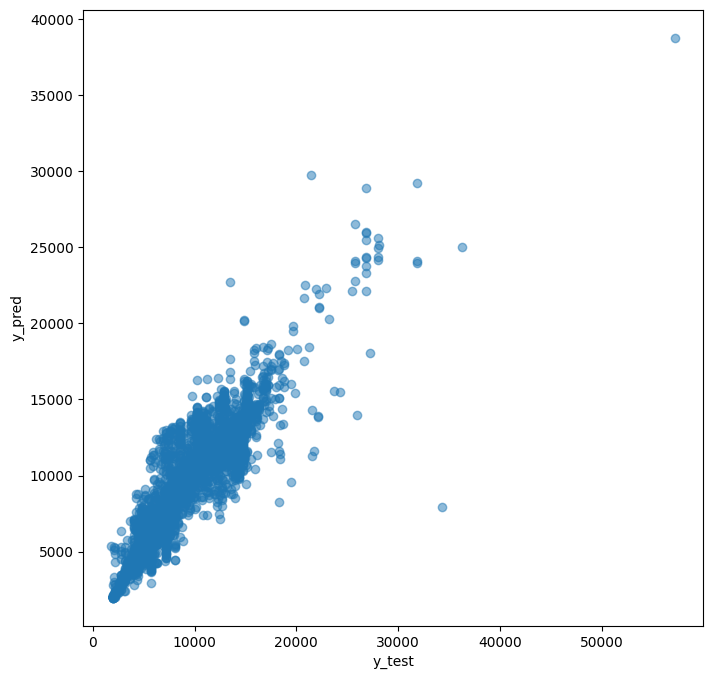

In [77]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1253.4967103344773
MSE: 3739547.75420632
RMSE: 1933.791031680083


In [79]:
metrics.r2_score(y_test, prediction)

0.8166971612947939

In [80]:
X_final = testset.copy()

In [83]:
X_final.isnull().sum()

,0
Total_Stops,8011
Journey_day,8011
Journey_month,8011
Journey_year,8011
Dep_hour,8011
Dep_min,8011
Arrival_hour,8011
Arrival_min,8011
Duration_hours,8011
Duration_mins,8011


In [84]:
y_final = rf_random.predict(X_final)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Journey_year
Feature names seen at fit time, yet now missing:
- Airline_Trujet


Save the model to reuse it again

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [ ]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)